In [ ]:
Q1- Using Make_blob generate data of 1000 data points with three cluster apply kmeans on it
with k = 3 and use the metrics and get the accuracy (For Accuracy take reference of DBSCAN
evaluation)
● Apply DBscan on Cust Segmentation Data

In [2]:
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler

In [3]:
import matplotlib.pyplot as plt
from sklearn import metrics

In [52]:
# Generate data with three clusters
X1, y1 = make_blobs(n_samples=1000, centers=3, random_state=25)

In [53]:
# Apply k-means with k=3
kmeans = KMeans(n_clusters=3, random_state=30)

In [54]:
kmeans.fit(X1)

KMeans(n_clusters=3, random_state=30)

In [55]:
X1

array([[ 6.25403299,  4.14238553],
       [-1.51790146, -7.66446399],
       [-4.51979763, -7.11993667],
       ...,
       [ 6.69642409,  1.22875987],
       [-3.05883241, -7.30460704],
       [ 7.43507273,  0.54901084]])

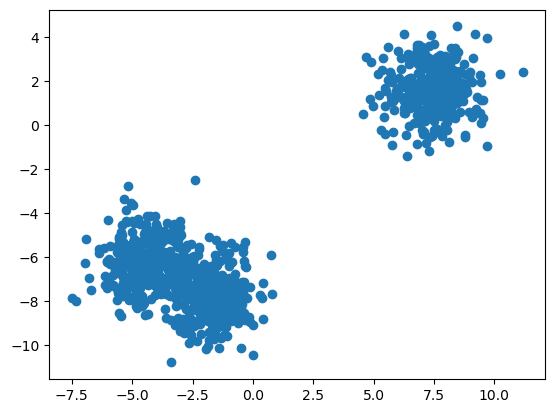

In [56]:
plt.scatter(X1[:,0],X1[:,1])

In [57]:
k_lab=kmeans.labels_

In [58]:
set(k_lab)

{0, 1, 2}

Text(0.5, 1.0, 'KMeans Clustering')

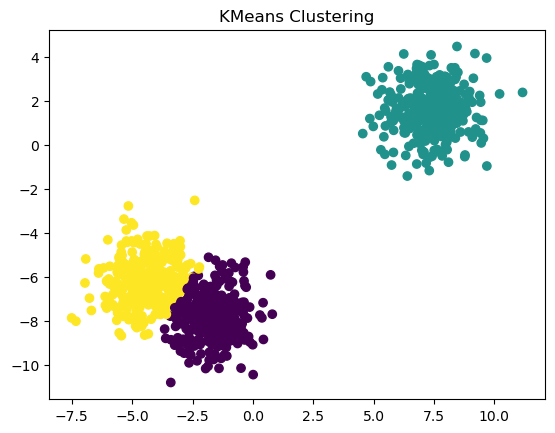

In [59]:
plt.scatter(X1[:,0],X1[:,1],c=k_lab)
plt.title('KMeans Clustering')

In [68]:
score = silhouette_score(X1,k_lab)

In [69]:
print(f"Silhouette score for k-means is: {score}")

Silhouette score for k-means is: 0.5997704006002617


In [70]:
# r2_score(X1,k_lab) 
#ValueError: Classification metrics can't handle mix of continuous-multioutput and multiclass targets


In [72]:
# Standardize the features
scaler = StandardScaler()
X1= scaler.fit_transform(X1)

In [73]:
# Apply DBSCAN
db1 = DBSCAN(eps=0.3, min_samples=15).fit(X1)

In [74]:
db1_lab=db1.labels_

In [75]:
set(db1_lab)

{-1, 0, 1}

In [76]:
print(f"homogeneity score : {metrics.homogeneity_score(k_lab,db1_lab)} ") 

homogeneity score : 0.5792498589329685 


Text(0.5, 1.0, 'DBSCAN Clustering')

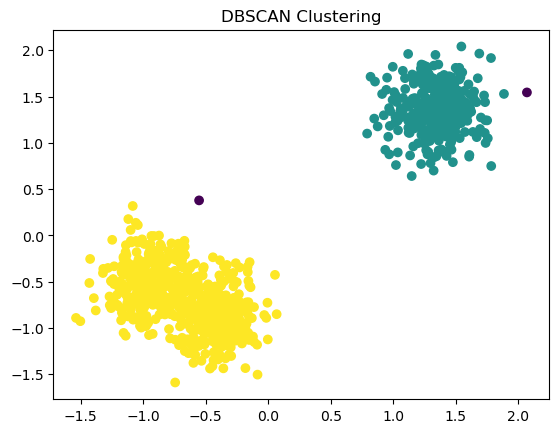

In [77]:
plt.scatter(X1[:,0],X1[:,1],c=db1_lab)
plt.title('DBSCAN Clustering')

In [78]:
score=silhouette_score(X1,db1_lab)

In [79]:
print(f"Silhouette score for DBscan is: {score}")

Silhouette score for DBscan is: 0.7511132985552212


In [ ]:

● Apply DBscan on Cust Segmentation Data

In [4]:
# Importing libraries
import pandas as pd
import numpy as np
from sklearn.cluster import DBSCAN
import matplotlib.pyplot as plt

In [81]:
# Loading the data
data = pd.read_csv('E:\insideAIML\ML\Mall_Customers.csv')

In [82]:
data

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18


In [83]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Genre                   200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [84]:
data.columns

Index(['CustomerID', 'Genre', 'Age', 'Annual Income (k$)',
       'Spending Score (1-100)'],
      dtype='object')

In [85]:
# Preprocessing the data
X = data.iloc[:, 3:5].values   # for customer data we take only Age ,Spending score

In [86]:
# X# Applying DBSCAN
dbscan = DBSCAN(eps=4, min_samples=8)
clusters = dbscan.fit_predict(X)


In [87]:
set(dbscan.labels_)

{-1, 0, 1, 2}

In [88]:
DBL=dbscan.labels_

In [89]:
# plt.scatter(X[:,0],X[:,1],c=DBL)

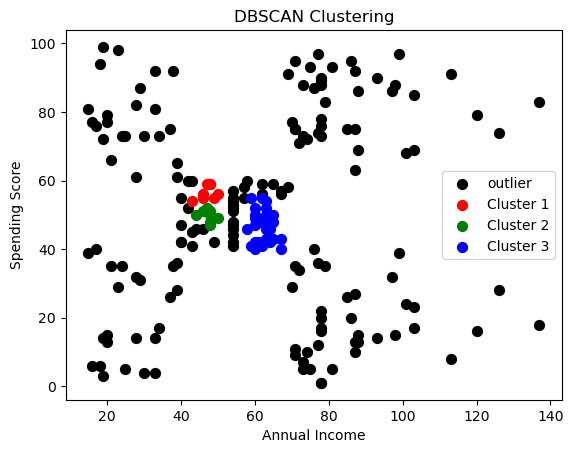

In [90]:

# Visualizing the clusters
plt.scatter(X[clusters==-1,0], X[clusters==-1,1], s=50, color='black', label='outlier')
plt.scatter(X[clusters==0,0], X[clusters==0,1], s=50, color='red', label='Cluster 1')
plt.scatter(X[clusters==1,0], X[clusters==1,1], s=50, color='green', label='Cluster 2')
plt.scatter(X[clusters==2,0], X[clusters==2,1], s=50, color='blue', label='Cluster 3')
plt.title('DBSCAN Clustering')
plt.xlabel('Annual Income')
plt.ylabel('Spending Score')
plt.legend()
plt.show()

In [ ]:
Q2-Using dirtydata.csv Demonstrate all the techniques for removing the null values

In [ ]:
● Replace by MEAN
● Replace by MEDIAN
● Replace by MODE
● Replace by ARBITUARY VALUE
● Replace by 0

In [134]:
data=pd.read_csv("dirtydata (1).csv")

In [141]:
data.head()

,Duration,Date,Pulse,Maxpulse,Calories
0,60,'2020/12/01',110,130,409.1
1,60,'2020/12/02',117,145,479.0
2,60,'2020/12/03',103,135,340.0
3,45,'2020/12/04',109,175,282.4
4,45,'2020/12/05',117,148,406.0


In [94]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32 entries, 0 to 31
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Duration  32 non-null     int64  
 1   Date      31 non-null     object 
 2   Pulse     32 non-null     int64  
 3   Maxpulse  32 non-null     int64  
 4   Calories  30 non-null     float64
dtypes: float64(1), int64(3), object(1)
memory usage: 1.4+ KB


In [95]:
data.isnull().sum()

Duration    0
Date        1
Pulse       0
Maxpulse    0
Calories    2
dtype: int64

In [96]:
data5.iloc[[18,28,22]]

,Duration,Date,Pulse,Maxpulse,Calories
18,45,'2020/12/18',90,112,0.0
28,60,'2020/12/28',103,132,0.0
22,45,0,100,119,282.0


In [97]:
data1=data.drop(['Date'],axis=1)  # we dont required it for mean cause it object 

In [98]:
data1.isnull().sum()

Duration    0
Pulse       0
Maxpulse    0
Calories    2
dtype: int64

In [99]:
mean_cal=data1.Calories.mean()

In [100]:
mean_cal

304.68

In [101]:
data1.Calories=data1.Calories.fillna(mean_cal)

In [102]:
print(f"the std before treatement was {data.Calories.std()} and std after treatement is {data1.Calories.std()}")

the std before treatement was 66.00377941111951 and std after treatement is 63.83912947098279


In [104]:
data1.iloc[[18,28]]

,Duration,Pulse,Maxpulse,Calories
18,45,90,112,304.68
28,60,103,132,304.68


In [ ]:
● Replace by MEDIAN

In [106]:
data2=data.drop(['Date'],axis=1)   # we dont required it for median cause it object 

In [107]:
median_cal=data2.Calories.median()

In [108]:
median_cal

291.2

In [109]:
data2.Calories=data2.Calories.fillna(median_cal)

In [111]:
data2.iloc[[18,28]]

,Duration,Pulse,Maxpulse,Calories
18,45,90,112,291.2
28,60,103,132,291.2


In [112]:
data2.Calories.std()

63.925151544599416

In [113]:
print(f"the std before treatement was {data.Calories.std()} and std after treatement is {data2.Calories.std()}")

the std before treatement was 66.00377941111951 and std after treatement is 63.925151544599416


In [ ]:
● Replace by MODE

In [115]:
data3=data

In [116]:
mode_cal=data3.Calories.mode()

In [117]:
mode_cal

0    300.0
Name: Calories, dtype: float64

In [118]:
data3.Calories=data3.Calories.fillna(mode_cal[0])

In [125]:
print(f"the std before treatement was {data.Calories.std()} and std after treatement is {data3.Calories.std()}")

the std before treatement was 63.84950425452328 and std after treatement is 63.84950425452328


In [120]:
type(data3.Date)

pandas.core.series.Series

In [121]:
mode_dat =data3.Date.mode()

In [122]:
mode_dat 

0    '2020/12/12'
Name: Date, dtype: object

In [123]:
data3.Date=data3.Date.fillna(mode_dat[0])

In [124]:
data3.iloc[[18,28,22]]

,Duration,Date,Pulse,Maxpulse,Calories
18,45,'2020/12/18',90,112,300.0
28,60,'2020/12/28',103,132,300.0
22,45,'2020/12/12',100,119,282.0


In [ ]:
● Replace by ARBITUARY VALUE

In [127]:
data4=data

In [128]:
data4.isnull().sum()

Duration    0
Date        1
Pulse       0
Maxpulse    0
Calories    2
dtype: int64

<AxesSubplot:>

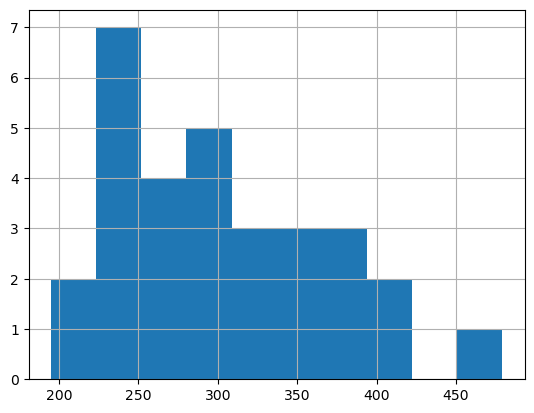

In [129]:
data4.Calories.hist()

In [130]:
data4.Calories=data4.Calories.fillna(225)

In [131]:
data4.Date=data4.Date.fillna('2020/12/12')

In [132]:
data.Date.iloc[22]

'2020/12/12'

In [133]:
data4.iloc[[18,28,22]]

,Duration,Date,Pulse,Maxpulse,Calories
18,45,'2020/12/18',90,112,225.0
28,60,'2020/12/28',103,132,225.0
22,45,2020/12/12,100,119,282.0


In [ ]:
● Replace by 0

In [137]:
data5=data

In [138]:
data5.Calories=data5.Calories.fillna(0)

In [139]:
data5.Date=data5.Date.fillna(0)

In [140]:
data5.iloc[[18,28,22]]

,Duration,Date,Pulse,Maxpulse,Calories
18,45,'2020/12/18',90,112,0.0
28,60,'2020/12/28',103,132,0.0
22,45,0,100,119,282.0
